In [59]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

%config Completer.use_jedi = False

In [2]:
df = pd.read_csv('./data/data_10kuser.csv')
df.dropna(subset=['sapo'], inplace=True)
df

,uid,articleID,sapo
0,1003322117,2132872,Tập cho tiền đình bớt nhạy cảm là cách chống s...
1,1002615050,2207856,Ngoài nguyên nhân uống rượu-bia hay cố tình bỏ...
2,1014147481,2207856,Ngoài nguyên nhân uống rượu-bia hay cố tình bỏ...
3,1003625169,2208722,"Nhiều người gán ghép cho xe số tự động là xe ""..."
6,1002615734,3100627,Hai người đàn ông vứt lại chiếc môtô và cắm đầ...
...,...,...,...
873041,1026683575,4245478,"Hoàng gia Anh ""kinh hoàng và mất tinh thần"" sa..."
873042,1003172704,4245478,"Hoàng gia Anh ""kinh hoàng và mất tinh thần"" sa..."
873043,1012576433,4245529,Novak Djokovic tin bản thân còn vượt nhiều kỷ ...
873044,1002757011,4245529,Novak Djokovic tin bản thân còn vượt nhiều kỷ ...


In [22]:
df_sapos = df[df.sapo.str.len() > 20]
df_sapos

,uid,articleID,sapo
0,1003322117,2132872,Tập cho tiền đình bớt nhạy cảm là cách chống s...
1,1002615050,2207856,Ngoài nguyên nhân uống rượu-bia hay cố tình bỏ...
2,1014147481,2207856,Ngoài nguyên nhân uống rượu-bia hay cố tình bỏ...
3,1003625169,2208722,"Nhiều người gán ghép cho xe số tự động là xe ""..."
6,1002615734,3100627,Hai người đàn ông vứt lại chiếc môtô và cắm đầ...
...,...,...,...
873041,1026683575,4245478,"Hoàng gia Anh ""kinh hoàng và mất tinh thần"" sa..."
873042,1003172704,4245478,"Hoàng gia Anh ""kinh hoàng và mất tinh thần"" sa..."
873043,1012576433,4245529,Novak Djokovic tin bản thân còn vượt nhiều kỷ ...
873044,1002757011,4245529,Novak Djokovic tin bản thân còn vượt nhiều kỷ ...


In [23]:
'''
get all uid have clicked > 10 articles
'''
def _get_uids(df):
    df_groups = df.groupby('uid')
    user_groups = []
    uids = []
    for uid, group in df_groups:
        count = group['articleID'].count()
        if(count > 10):
            uids.append(uid)
            
    return uids
uids = _get_uids(df_sapos)
print(len(uids))

4604


In [44]:
'''
get all articles have [10-30] user clicked
bonus: get articles having userful sapos
'''
def _get_articles(df):
    articles_groups = df.groupby('articleID')
    articles = []

    for articleid, group in articles_groups:
        count = group['uid'].count()
        
        if(count > 10 and count < 1000 ):
            good_sapo = df[df.articleID == articleid].sapo.str.len() > 20
            if (good_sapo.values[0]):
                articles.append(articleid)
    
    return articles
# articles = _get_articles(df)
# print(len(articles))

In [24]:
df_uids = df_sapos[(df_sapos['uid'].isin(uids)) ].drop_duplicates(subset='articleID')
df_uids

,uid,articleID,sapo
0,1003322117,2132872,Tập cho tiền đình bớt nhạy cảm là cách chống s...
1,1002615050,2207856,Ngoài nguyên nhân uống rượu-bia hay cố tình bỏ...
3,1003625169,2208722,"Nhiều người gán ghép cho xe số tự động là xe ""..."
6,1002615734,3100627,Hai người đàn ông vứt lại chiếc môtô và cắm đầ...
7,1002611667,3101986,Tôi đã mơ đến những cái xa hơn với em nhưng bi...
...,...,...,...
873033,1003895151,4245454,"Cuộc phỏng vấn ""bom tấn"" với Harry - Meghan về..."
873034,1002660421,4245457,"Nhân vật Châu của phim ""Hướng dương ngược nắng..."
873037,1004158229,4245478,"Hoàng gia Anh ""kinh hoàng và mất tinh thần"" sa..."
873043,1012576433,4245529,Novak Djokovic tin bản thân còn vượt nhiều kỷ ...


In [25]:
df_groups = df_uids.groupby('uid')

count = 0
for name, group in df_groups:
    leng = group['articleID'].count()
    if(leng > 10):
        count+=1
count

1147

In [27]:
df_groups.head()

,uid,articleID,sapo
0,1003322117,2132872,Tập cho tiền đình bớt nhạy cảm là cách chống s...
1,1002615050,2207856,Ngoài nguyên nhân uống rượu-bia hay cố tình bỏ...
3,1003625169,2208722,"Nhiều người gán ghép cho xe số tự động là xe ""..."
6,1002615734,3100627,Hai người đàn ông vứt lại chiếc môtô và cắm đầ...
7,1002611667,3101986,Tôi đã mơ đến những cái xa hơn với em nhưng bi...
...,...,...,...
872896,1005325310,4245345,UBND Hà Nội cho phép mở cửa danh thắng chùa Hư...
873010,1014162949,4245441,Thầy trò Thomas Tuchel đánh bại đối thủ cạnh t...
873034,1002660421,4245457,"Nhân vật Châu của phim ""Hướng dương ngược nắng..."
873043,1012576433,4245529,Novak Djokovic tin bản thân còn vượt nhiều kỷ ...


## 

## articles, user, sapo condition

In [91]:
uids = _get_uids(df)
articles = _get_articles(df)

In [92]:
def _getArticles_user(uids, articles):
    data_dict = dict()

    for uid in uids:
        tmp_df = df[df.uid == uid]
        all_articles = tmp_df['articleID'].values

        all_articles = set(all_articles)
        articles_tmp = []
        for article in all_articles: 
            if(article in articles):
                articles_tmp.append(article)
        data_dict[uid] = articles_tmp
    return data_dict

In [93]:
'''
function calculate cover_rules
@return list_unique_item each thread
''' 
def _pool_calcualte_uids(uids, articles, cores, func):
    import numpy as np
    from multiprocessing import Pool

    
    n_cores = cores
    pool = Pool(n_cores)
    uids_split = np.array_split(uids, n_cores)
    arguments = []
    for i in range(n_cores):
        arg = (uids_split[i], articles)
        arguments.append(arg)
    result_list = pool.starmap(func, arguments)
    return result_list

In [94]:
result_dict = _pool_calcualte_uids(uids, articles, cores=32, func=_getArticles_user)

In [95]:
# merge user dict
data_dict = result_dict[0]
for i in range(1, len(result_dict)):
    data_dict.update(result_dict[i])

In [96]:
# Statistical
all_articles = []
for key in data_dict:
    for x in data_dict[key]:
        all_articles.append(x)
all_articles = list(set(all_articles))
print('leng unique articles:',len(all_articles))

leng unique articles: 11712


In [98]:
# save user > 10, articles [10,30] and useful sapo
file = open('./model/10kusers/data_dict_sapo.pkl', 'wb')
pickle.dump(data_dict, file)
file.close()

## 

In [14]:
# save user > 10, articles [10,30], not sapo condition
file = open('./model/10kusers/user_articles_dict_10karticles.pkl', 'wb')
pickle.dump(data_dict, file)
file.close()

In [6]:
file = open('./model/10kusers/data_dict_sapo.pkl', 'rb')
data_dict = pickle.load(file)
file.close()

## new data

In [40]:
df_6kuser = pd.read_csv('./data/data_6kuser.csv')
df_6kuser

,uid,articleID,sapo
0,1006923096,2191240,Đầu xe mình chạm cạnh dưới biển số xe trước là...
1,1014147481,2191240,Đầu xe mình chạm cạnh dưới biển số xe trước là...
2,1007506304,2191240,Đầu xe mình chạm cạnh dưới biển số xe trước là...
3,1002615050,2207856,Ngoài nguyên nhân uống rượu-bia hay cố tình bỏ...
4,1014147481,2207856,Ngoài nguyên nhân uống rượu-bia hay cố tình bỏ...
...,...,...,...
713088,1004228557,4248348,HLV Alexandre Polking bố trí Lee Nguyễn trong ...
713089,1043162603,4248367,Romelu Lukaku và Lautaro Martinez cùng ghi bàn...
713090,1002624858,4248376,"Lần đầu tiên, giống lợn ỉ có nguy cơ tuyệt chủ..."
713091,1062314309,4248376,"Lần đầu tiên, giống lợn ỉ có nguy cơ tuyệt chủ..."


In [41]:
df_6kuser_sapo = df_6kuser[df_6kuser.sapo.str.len() > 20]
df_6kuser_sapo

,uid,articleID,sapo
0,1006923096,2191240,Đầu xe mình chạm cạnh dưới biển số xe trước là...
1,1014147481,2191240,Đầu xe mình chạm cạnh dưới biển số xe trước là...
2,1007506304,2191240,Đầu xe mình chạm cạnh dưới biển số xe trước là...
3,1002615050,2207856,Ngoài nguyên nhân uống rượu-bia hay cố tình bỏ...
4,1014147481,2207856,Ngoài nguyên nhân uống rượu-bia hay cố tình bỏ...
...,...,...,...
713088,1004228557,4248348,HLV Alexandre Polking bố trí Lee Nguyễn trong ...
713089,1043162603,4248367,Romelu Lukaku và Lautaro Martinez cùng ghi bàn...
713090,1002624858,4248376,"Lần đầu tiên, giống lợn ỉ có nguy cơ tuyệt chủ..."
713091,1062314309,4248376,"Lần đầu tiên, giống lợn ỉ có nguy cơ tuyệt chủ..."


In [78]:
df_6kuser_sapo.to_csv('./data/data_6kuser_sapo.csv', index=False)

In [76]:
df_groups = df_6kuser_sapo.groupby('uid')
user6k_articles_dict = dict()
articles_sapos_dict = dict()
for name, group in df_groups:
    arr_articles = group.articleID.to_list()
    arr_sapos = group.sapo.to_list()
    number_articles = len(arr_articles)
    if number_articles >=10 and number_articles <200 :
        user6k_articles_dict[name] = arr_articles[0:50]

len(user6k_articles_dict)

5981

In [77]:
file = open('./model/data_dict/user6k_articles_dict.pkl', 'wb')
pickle.dump(user6k_articles_dict, file)
file.close()

## Statistical

In [53]:
df_6k = pd.DataFrame()
df_6k['uid'] = user6k_articles_dict.keys()
df_6k['articles'] = user6k_articles_dict.values()
df_6k

/home/thuytt/miniconda3/envs/tf-gpu/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,uid,articles
0,1002611508,"[4054563, 4071525, 4075446, 4075913, 4076258, ..."
1,1002611535,"[4137226, 4145071, 4146965, 4158734, 4161961, ..."
2,1002611542,"[3106791, 3117713, 3117713, 3120961, 3124645, ..."
3,1002611620,"[4146372, 4146817, 4147100, 4147426, 4148204, ..."
4,1002611624,"[4077462, 4077953, 4080481, 4101976, 4109393, ..."
...,...,...
6749,1064774956,"[4227893, 4227893, 4227893, 4227893, 4229813, ..."
6750,1065082122,"[4229549, 4233949, 4234422, 4234672, 4234831, ..."
6751,1065092008,"[4228400, 4230197, 4231206, 4231882, 4233032, ..."
6752,1065180200,"[4235252, 4236495, 4237296, 4237440, 4237442, ..."


In [56]:
uid_count_articles = [len(x) for x in df_6k.articles]
df_6k['number_articles'] = uid_count_articles
df_6k

,uid,articles,number_articles
0,1002611508,"[4054563, 4071525, 4075446, 4075913, 4076258, ...",18
1,1002611535,"[4137226, 4145071, 4146965, 4158734, 4161961, ...",26
2,1002611542,"[3106791, 3117713, 3117713, 3120961, 3124645, ...",45
3,1002611620,"[4146372, 4146817, 4147100, 4147426, 4148204, ...",170
4,1002611624,"[4077462, 4077953, 4080481, 4101976, 4109393, ...",17
...,...,...,...
6749,1064774956,"[4227893, 4227893, 4227893, 4227893, 4229813, ...",10
6750,1065082122,"[4229549, 4233949, 4234422, 4234672, 4234831, ...",25
6751,1065092008,"[4228400, 4230197, 4231206, 4231882, 4233032, ...",103
6752,1065180200,"[4235252, 4236495, 4237296, 4237440, 4237442, ...",11


In [69]:
df_6k_max200 = df_6k[df_6k['number_articles']<200]
df_6k_max200

,uid,articles,number_articles
0,1002611508,"[4054563, 4071525, 4075446, 4075913, 4076258, ...",18
1,1002611535,"[4137226, 4145071, 4146965, 4158734, 4161961, ...",26
2,1002611542,"[3106791, 3117713, 3117713, 3120961, 3124645, ...",45
3,1002611620,"[4146372, 4146817, 4147100, 4147426, 4148204, ...",170
4,1002611624,"[4077462, 4077953, 4080481, 4101976, 4109393, ...",17
...,...,...,...
6747,1064608692,"[4224327, 4224327, 4224392, 4224392, 4224392, ...",37
6749,1064774956,"[4227893, 4227893, 4227893, 4227893, 4229813, ...",10
6750,1065082122,"[4229549, 4233949, 4234422, 4234672, 4234831, ...",25
6751,1065092008,"[4228400, 4230197, 4231206, 4231882, 4233032, ...",103


<AxesSubplot:title={'center':'Number articles in each uid'}, ylabel='Frequency'>

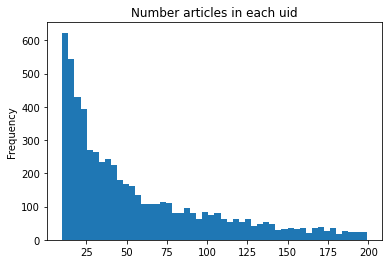

In [68]:
plt.title('Number articles in each uid')
df_6k_max200['number_articles'].plot.hist(bins=50)